<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [ ]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [ ]:
# Load the dataset from a CSV file

URL = "../data/processed/dataset_part_2.csv"
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,5919.165341,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


c:\Users\od140\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\od140\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


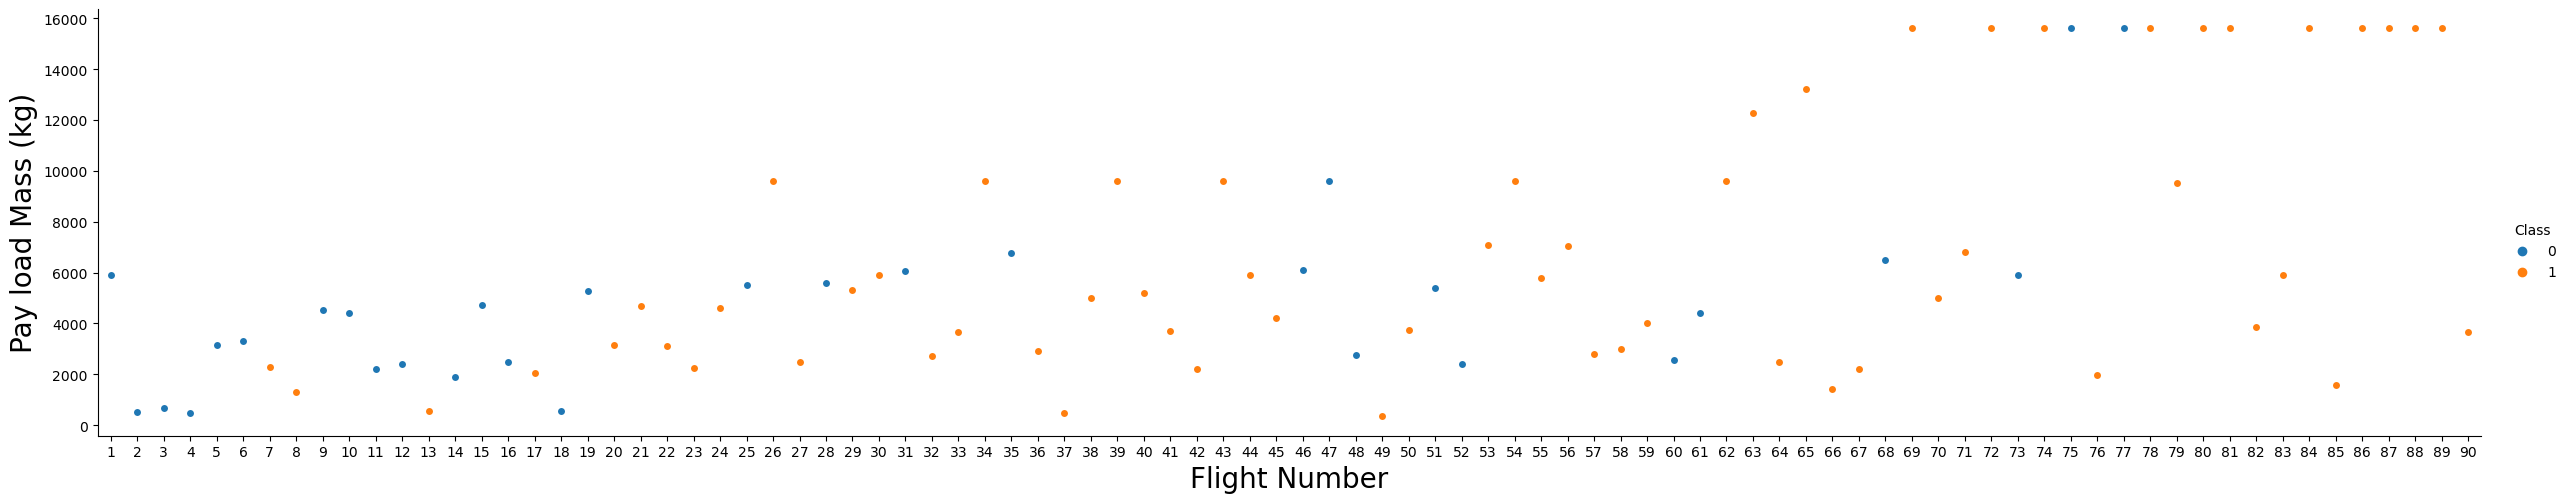

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
PLT.TITLE = "Pay load Mass vs Flight Number"
plt.xticks(rotation=90)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


### TASK 1: Visualize the relationship between Flight Number and Launch Site


(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

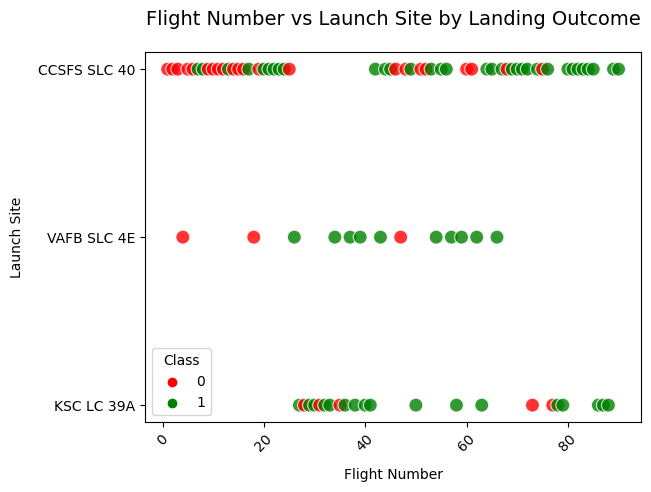

In [5]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
scatter = sns.scatterplot(
    x="FlightNumber",        # Flight number on x-axis
    y="LaunchSite",          # Launch site on y-axis
    hue="Class",             # Color by success (1) vs failure (0)
    data=df,                 # Your DataFrame
    palette={0: "red", 1: "green"},  # Red=failure, Green=success
    s=100,                   # Marker size
    alpha=0.8                # Transparency
)

# Customize the plot
plt.title("Flight Number vs Launch Site by Landing Outcome", pad=20, fontsize=14)
plt.xlabel("Flight Number", labelpad=10)
plt.ylabel("Launch Site", labelpad=10)
plt.xticks(rotation=45)



Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16000., 18000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000'),
  Text(14000.0, 0, '14000'),
  Text(16000.0, 0, '16000'),
  Text(18000.0, 0, '18000')])

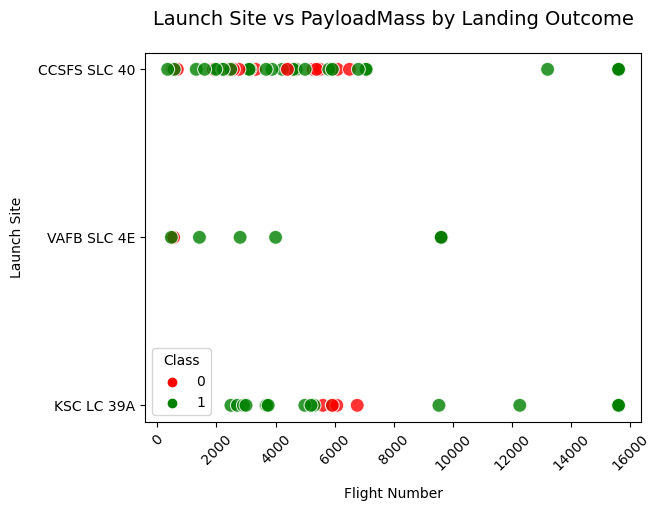

In [6]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
scatter = sns.scatterplot(
    x="PayloadMass",        # Flight number on x-axis
    y="LaunchSite",          # Launch site on y-axis
    hue="Class",             # Color by success (1) vs failure (0)
    data=df,                 # Your DataFrame
    palette={0: "red", 1: "green"},  # Red=failure, Green=success
    s=100,                   # Marker size
    alpha=0.8                # Transparency
)

# Customize the plot
plt.title("Launch Site vs PayloadMass by Landing Outcome", pad=20, fontsize=14)
plt.xlabel("Flight Number", labelpad=10)
plt.ylabel("Launch Site", labelpad=10)
plt.xticks(rotation=45)


Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


C:\Users\od140\AppData\Local\Temp\ipykernel_20820\1801216106.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


NameError: name 'ax' is not defined

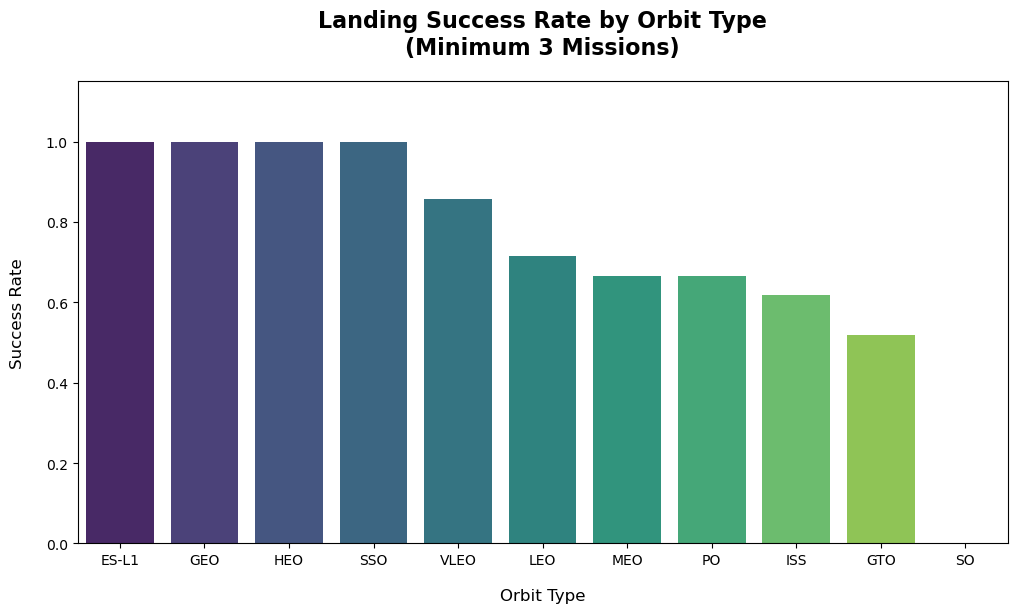

In [9]:
# HINT use groupby method on Orbit column and get the mean of Class column

# Calculate success rate by orbit
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()
orbit_success.columns = ['Orbit', 'SuccessRate']

# Sort by success rate
orbit_success = orbit_success.sort_values('SuccessRate', ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x='Orbit',
    y='SuccessRate',
    data=orbit_success,
    palette='viridis',  # Color gradient
    ci=None            # Remove confidence intervals
)

# Customize the plot
plt.title('Landing Success Rate by Orbit Type\n(Minimum 3 Missions)', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Orbit Type', fontsize=12, labelpad=15)
plt.ylabel('Success Rate', fontsize=12, labelpad=15)
plt.ylim(0, 1.15)  # Extra space for annotations

# Add orbit names and success rates
for i, (orbit, rate) in enumerate(zip(orbit_success['Orbit'], 
                                           orbit_success['SuccessRate'])):
    # Display success rate percentage
    ax.text(
        i, 
        rate + 0.02, 
        f'{rate:.0%}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )
    
    # Display mission count
    ax.text(
        i, 
        -0.05, 
        f'n={count}',
        ha='center',
        va='top',
        fontsize=9,
        color='gray'
    )

# Add reference lines
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.3, linewidth=1)
plt.axhline(y=0.8, color='green', linestyle=':', alpha=0.3, linewidth=1)

# Rotate orbit labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Analyze the plotted bar chart to identify which orbits have the highest success rates.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

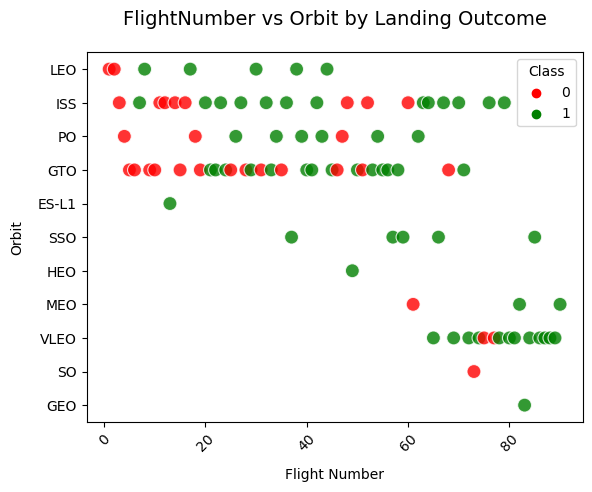

In [10]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class valuescatter = sns.scatterplot(
 
scatter = sns.scatterplot(
    x="FlightNumber",        # Flight number on x-axis
    y="Orbit",          # Launch site on y-axis
    hue="Class",             # Color by success (1) vs failure (0)
    data=df,                 # Your DataFrame
    palette={0: "red", 1: "green"},  # Red=failure, Green=success
    s=100,                   # Marker size
    alpha=0.8                # Transparency
)

# Customize the plot
plt.title("FlightNumber vs Orbit by Landing Outcome", pad=20, fontsize=14)
plt.xlabel("Flight Number", labelpad=10)
plt.ylabel("Orbit", labelpad=10)
plt.xticks(rotation=45)

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16000., 18000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000'),
  Text(14000.0, 0, '14000'),
  Text(16000.0, 0, '16000'),
  Text(18000.0, 0, '18000')])

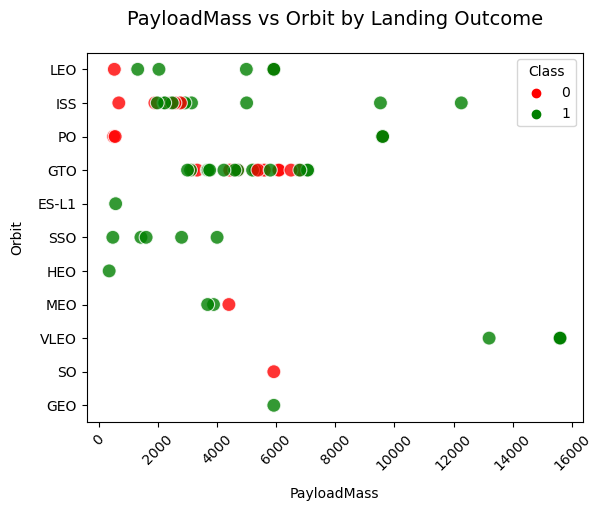

In [11]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
scatter = sns.scatterplot(
    x="PayloadMass",        # Flight number on x-axis
    y="Orbit",          # Launch site on y-axis
    hue="Class",             # Color by success (1) vs failure (0)
    data=df,                 # Your DataFrame
    palette={0: "red", 1: "green"},  # Red=failure, Green=success
    s=100,                   # Marker size
    alpha=0.8                # Transparency
)

# Customize the plot
plt.title("PayloadMass vs Orbit by Landing Outcome", pad=20, fontsize=14)
plt.xlabel("PayloadMass", labelpad=10)
plt.ylabel("Orbit", labelpad=10)
plt.xticks(rotation=45)

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [12]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,5919.165341,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


c:\Users\od140\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\od140\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


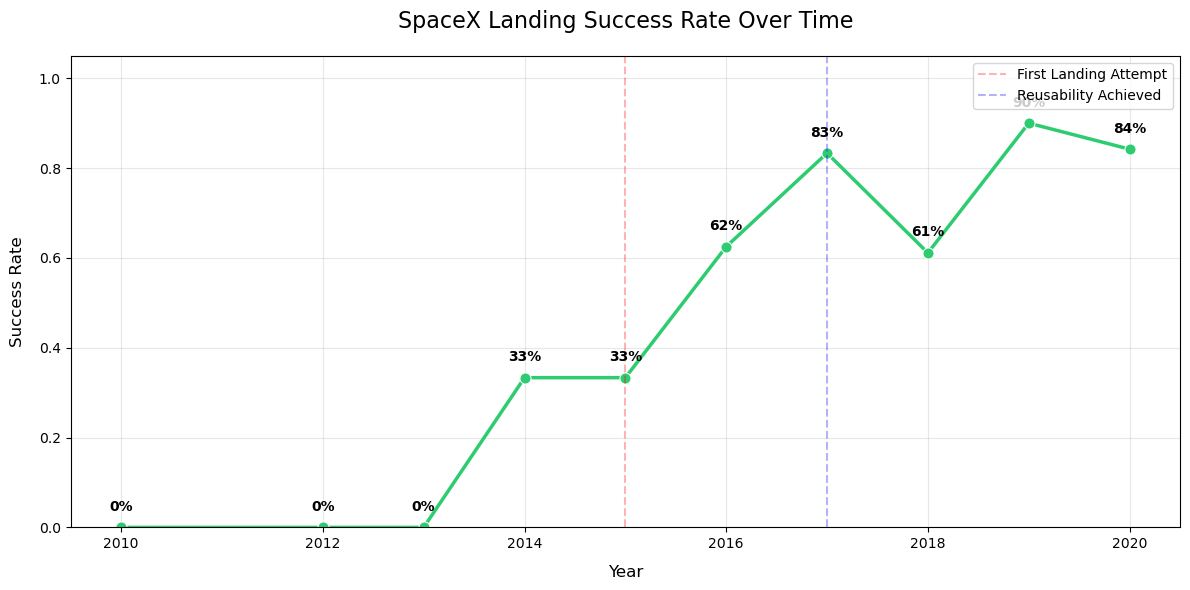

In [13]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df['Year'] = pd.to_datetime(df['Date']).dt.year
annual_success = df.groupby('Year')['Class'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(
    x='Year',
    y='Class',
    data=annual_success,
    marker='o',            # Show data points
    markersize=8,          # Point size
    linewidth=2.5,         # Line thickness
    color='#2ecc71'        # Green color
)

# Customize the plot
plt.title('SpaceX Landing Success Rate Over Time', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('Success Rate', fontsize=12, labelpad=10)
plt.ylim(0, 1.05)         # Set y-axis limits
plt.grid(True, alpha=0.3) # Add grid lines

# Add value labels above each point
for x, y in zip(annual_success['Year'], annual_success['Class']):
    plt.text(
        x, y + 0.03, 
        f'{y:.0%}', 
        ha='center', 
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Highlight important milestones
plt.axvline(x=2015, color='red', linestyle='--', alpha=0.3, label='First Landing Attempt')
plt.axvline(x=2017, color='blue', linestyle='--', alpha=0.3, label='Reusability Achieved')

plt.legend()
plt.tight_layout()
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,5919.165341,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [15]:
# HINT: Use get_dummies() function on the categorical columns
# Select categorical columns to encode
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Apply One-Hot Encoding using get_dummies
features_one_hot = pd.get_dummies(
    features,  # Your original features DataFrame
    columns=categorical_cols,
    prefix=categorical_cols,
    drop_first=False  # Keep all categories
)

# Display the first 5 rows
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  5919.165341        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0            0        False      False  ...         False         False   
1            0        False      False  ...         False         False   
2            0        False      False  ...         False         False   
3            0        False      False  ...         False         False   
4            0        False      False  ...         False         False   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0         False         False      

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [16]:
# HINT: use astype function
# Force convert everything, non-convertible becomes NaN
df_float64 = df.apply(pd.to_numeric, errors='coerce').astype('float64')

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [18]:
features_one_hot.to_csv('../data/processed/dataset_part_3.csv', index=False)


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
